##**Computer Vision Final Project**
***Mehrshad Saadatinia***

Version 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras import backend as K

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [2]:
base = os.getcwd()
os.chdir(os.path.join(base, 'drive', 'MyDrive', 'datasets'))

In [3]:
datapath = os.path.join(os.getcwd(), 'lfw', 'lfw')
class_names = sorted(os.listdir(datapath))
print(class_names)

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

In [4]:
no_classes = len(class_names)
print(f"No. of Classes: {no_classes}")

No. of Classes: 5749


### **Loading and Preprocessing Data**
In this section we load images and create our dataset in the form of (image pair, label) <br>
We want to create a dataset of size `size`, therefor, we loop `size` times and each time randomely select a class from which we randomly choose two images (similar pair). the label for this pair is `1` meaning they are the same person.
<br>
After that we select two classes from whih we sample two images. These make up our `Not same` pair with label `0`.

Original images are **250x250**. I resized them to **224x224** to be used in VGG-16 CNN, but It did not fit in Google Colab RAM, so I used **112x112**

In [5]:
DIM = 112

def load_image(filepath):
   image = cv2.cvtColor(
      cv2.imread(filepath), cv2.COLOR_BGR2RGB)
   image = cv2.resize(image, (DIM, DIM))
   image = image.astype('float32') / 255.0
   return image



def display_pair(pairs, index):
  i = index
  plt.imshow(pairs[i][0])
  plt.show()
  plt.imshow(pairs[i][1])
  plt.show()



def add_identical_pairs(full_path, selected):
  first, second = selected[0], selected[1]
  dir_list = os.listdir(full_path)
  image_1 = load_image( os.path.join(full_path, dir_list[first]) )
  image_2 = load_image( os.path.join(full_path, dir_list[second]) )
  return [image_1, image_2]
  


def add_different_pairs(path1, path2, i, j):
  dir_list1, dir_list2 = os.listdir(path1), os.listdir(path2)
  im_path1 = os.path.join(path1, dir_list1[i])
  im_path2 = os.path.join(path2, dir_list2[j])
  image_1 = load_image(im_path1)
  image_2 = load_image(im_path2)
  return [image_1, image_2]


def create_pairs(size):
  pairs = []
  labels = []
 
  for i in range(size):
    print(f">> {i}")
    gen_count = 1
    while gen_count == 1:
      c = random.randrange(0, no_classes)
      dir_name = class_names[c]
      full_path = os.path.join(datapath, dir_name)
      gen_count = len(os.listdir(full_path))
    #### create a pair of images from the same class
    selected = random.sample(range(gen_count), 2)
    selected_pair = add_identical_pairs(full_path, selected)
    pairs.append(selected_pair)
    labels.append(1)
    #### create a pair of images from different classes
    c1, c2 = random.sample(range(no_classes), 2)
    dir1, dir2 = class_names[c1],  class_names[c2]
    path1, path2 = os.path.join(datapath, dir1), os.path.join(datapath, dir2)
    count1, count2 = len(os.listdir(path1)), len(os.listdir(path2))
    i, j = random.randrange(0, count1), random.randrange(0, count2)
    different_pairs = add_different_pairs(path1, path2, i, j)
    pairs.append(different_pairs)
    labels.append(0)
  print("==============================================================")
  return np.array(pairs), np.array(labels).astype('float32')
  


We generate data pairs as many as we want (and can fit in the RAM)

In [6]:
train_size = 2000
val_size = 100
test_size = 50

X_train, y_train = create_pairs(train_size)
X_val, y_val = create_pairs(val_size)
X_test, y_test = create_pairs(test_size)

>> 0
>> 1
>> 2
>> 3
>> 4
>> 5
>> 6
>> 7
>> 8
>> 9
>> 10
>> 11
>> 12
>> 13
>> 14
>> 15
>> 16
>> 17
>> 18
>> 19
>> 20
>> 21
>> 22
>> 23
>> 24
>> 25
>> 26
>> 27
>> 28
>> 29
>> 30
>> 31
>> 32
>> 33
>> 34
>> 35
>> 36
>> 37
>> 38
>> 39
>> 40
>> 41
>> 42
>> 43
>> 44
>> 45
>> 46
>> 47
>> 48
>> 49
>> 50
>> 51
>> 52
>> 53
>> 54
>> 55
>> 56
>> 57
>> 58
>> 59
>> 60
>> 61
>> 62
>> 63
>> 64
>> 65
>> 66
>> 67
>> 68
>> 69
>> 70
>> 71
>> 72
>> 73
>> 74
>> 75
>> 76
>> 77
>> 78
>> 79
>> 80
>> 81
>> 82
>> 83
>> 84
>> 85
>> 86
>> 87
>> 88
>> 89
>> 90
>> 91
>> 92
>> 93
>> 94
>> 95
>> 96
>> 97
>> 98
>> 99
>> 100
>> 101
>> 102
>> 103
>> 104
>> 105
>> 106
>> 107
>> 108
>> 109
>> 110
>> 111
>> 112
>> 113
>> 114
>> 115
>> 116
>> 117
>> 118
>> 119
>> 120
>> 121
>> 122
>> 123
>> 124
>> 125
>> 126
>> 127
>> 128
>> 129
>> 130
>> 131
>> 132
>> 133
>> 134
>> 135
>> 136
>> 137
>> 138
>> 139
>> 140
>> 141
>> 142
>> 143
>> 144
>> 145
>> 146
>> 147
>> 148
>> 149
>> 150
>> 151
>> 152
>> 153
>> 154
>> 155
>> 156
>> 157
>> 1

Save Datasets as numpy arrays

In [7]:
import pickle

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)

np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

In [6]:
X_train, y_train = np.load("X_train.npy"), np.load("y_train.npy")
X_val, y_val = np.load("X_val.npy"), np.load("y_val.npy")

In [7]:
X_train.shape, y_train.shape

((4000, 2, 112, 112, 3), (4000,))

In [8]:
#batch_size = 8
#
#train_dataset = tf.data.Dataset.from_tensor_slices(({"left_input": X_train[:, 0], "right_input": X_train[:, 1]}, y_train))
#val_dataset = tf.data.Dataset.from_tensor_slices(({"left_input": X_val[:, 0], "right_input": X_val[:, 1]}, y_val))
#
#AUTOTUNE = tf.data.AUTOTUNE
#train_ds = train_dataset.batch(batch_size, drop_remainder=False).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_dataset.batch(batch_size, drop_remainder=False).prefetch(buffer_size=AUTOTUNE)

####**Build the CNN architecture**
The original CNN which I used was VGG16, But it overfitted and was too complicated. Therefor we halved the number of filters in each layer of VGG1 and Obtained the CNN below.

We will used a ***Siamese Network*** in order to compare pairs of images. It consists of two identical CNN pairs. the outputs of which are compared using euclidean distance and outputs a number which represent the distance of two images (image embeddings) each time.

It also uses a ***contrastive loss*** function to omptimize and learn.

contrastive loss is evaluating how good a job the siamese network is distinguishing between the image pairs. 

In [8]:
def initialize_base_branch():
    input = keras.layers.Input(shape=(DIM, DIM, 3), name="base_input")
    x = keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu")(input)
    x = keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(2048,activation="relu")(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(2048,activation="relu")(x)
    return Model(inputs=input, outputs=x)

base_model = initialize_base_branch()

**Euclidean Distance** which will serve as the model output `y_hat`

In [9]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [10]:
input_l = Input(shape=(DIM, DIM, 3), name='left_input')
vect_output_l = base_model(input_l)

input_r = Input(shape=(DIM, DIM, 3), name='right_input')
vect_output_r = base_model(input_r)

output = Lambda(euclidean_distance, name='output_layer', 
                output_shape=eucl_dist_output_shape)([vect_output_l, vect_output_r])

model = Model([input_l, input_r], output)

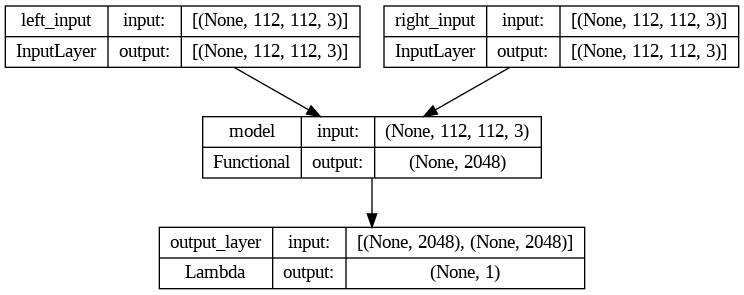

In [11]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='siamese_model.png', show_shapes=True)

The contrastive loss, defined using the formula [here](https://www.projectpro.io/article/siamese-neural-networks/718)

In [11]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss


def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

**Train** for 50 epochs using 0.00008 learning rate and RMSProp optimizer

In [13]:
rms = RMSprop(learning_rate=0.00008)
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=50, validation_data=[[X_val[:, 0], X_val[:, 1]], y_val], batch_size= 16)

Epoch 1/50
250/250 [==============================] - 23s 54ms/step - loss: 0.2676 - val_loss: 0.4700
Epoch 2/50
250/250 [==============================] - 13s 53ms/step - loss: 0.2536 - val_loss: 0.4339
Epoch 3/50
250/250 [==============================] - 14s 55ms/step - loss: 0.2502 - val_loss: 0.3953
Epoch 4/50
250/250 [==============================] - 13s 53ms/step - loss: 0.2467 - val_loss: 0.3403
Epoch 5/50
250/250 [==============================] - 13s 54ms/step - loss: 0.2427 - val_loss: 0.3203
Epoch 6/50
250/250 [==============================] - 13s 54ms/step - loss: 0.2357 - val_loss: 0.2984
Epoch 7/50
250/250 [==============================] - 13s 54ms/step - loss: 0.2278 - val_loss: 0.3033
Epoch 8/50
250/250 [==============================] - 13s 53ms/step - loss: 0.2206 - val_loss: 0.2563
Epoch 9/50
250/250 [==============================] - 13s 53ms/step - loss: 0.2096 - val_loss: 0.2514
Epoch 10/50
250/250 [==============================] - 13s 53ms/step - loss: 0.197

In [12]:
model = keras.models.load_model('face_model_full.h5', custom_objects={"contrastive_loss": contrastive_loss_with_margin(margin=1)})

###**Evaluations**

In [13]:
loss = model.evaluate([X_val[:, 0], X_val[:, 1]], y_val)

y_pred_train = model.predict([X_train[:, 0], X_train[:, 1]])
train_accuracy = compute_accuracy(y_train, y_pred_train)

y_pred_val = model.predict([X_val[:, 0], X_val[:, 1]])
val_accuracy = compute_accuracy(y_val, y_pred_val)

print("Loss = {}, Train Accuracy = {}% Test Accuracy = {}%".format(loss, train_accuracy*100, val_accuracy*100))

7/7 [==============================] - 13s 2s/step
Loss = 0.22523827850818634, Train Accuracy = 99.45% Test Accuracy = 69.5%


In [14]:
model.save('face_model_full.h5')

In [33]:
def compare_images(path1, path2):
  im1 = load_image(path1)
  im2 = load_image(path2)
  plt.subplot(1, 2, 1)
  plt.imshow(im1)
  plt.subplot(1, 2, 2)
  plt.imshow(im2)
  
  distance = model.predict([np.array([im1]), np.array([im2])])
  print(f"Distance:  {np.squeeze(distance)}")
  pred_str = 'Same' if np.squeeze((distance < 0.5).astype('float32')) == 1 else 'Not Same'
  print(f"Prediction: Images are {pred_str}")


1/1 [==============================] - 0s 19ms/step
Distance:  0.029081543907523155
Prediction: Images are Same


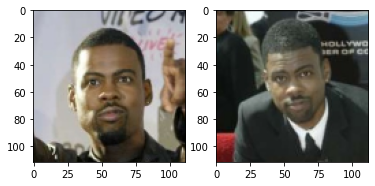

In [34]:
path1 = os.path.join(datapath, 'Chris_Rock', 'Chris_Rock_0001.jpg')
path2 = os.path.join(datapath, 'Chris_Rock', 'Chris_Rock_0002.jpg')
compare_images(path1, path2)

1/1 [==============================] - 0s 32ms/step
Distance:  0.9464706778526306
Prediction: Images are Not Same


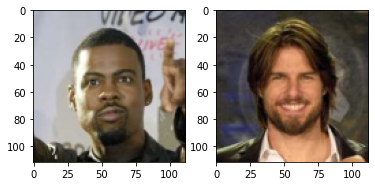

In [36]:
path1 = os.path.join(datapath, 'Chris_Rock', 'Chris_Rock_0001.jpg')
path2 = os.path.join(datapath, 'Tom_Cruise', 'Tom_Cruise_0001.jpg')
compare_images(path1, path2)

1/1 [==============================] - 0s 21ms/step
Distance:  0.8882242441177368
Prediction: Images are Not Same


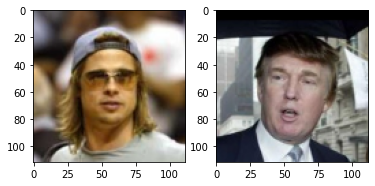

In [41]:
path1 = os.path.join(datapath, 'Brad_Pitt', 'Brad_Pitt_0001.jpg')
path2 = os.path.join(datapath, 'Donald_Trump', 'Donald_Trump_0001.jpg')
compare_images(path1, path2)